#  Model Performance Evaluation in a Marketing Campaign

In this assignment, we will explore the significance of False Positives (FPs), False Negatives (FNs), and key metrics such as Precision, Recall, Accuracy, F1 Score, and AUC. The goal is to evaluate both Logistic Regression and KNN models thoroughly and compare their performance using various metrics and visualizations.

### False Positive (FP):
When the model predicts that a customer will respond to the campaign, but in reality, they don't. This leads to wasted marketing efforts, but the cost is lower compared to missing out on a responsive customer.

### False Negative (FN):
When the model predicts that a customer will not respond, but they actually would have if contacted. This is a costly error as it represents a missed opportunity to convert a potential customer.

### Metrics Overview:
- **Recall**: This metric measures how effectively the model identifies customers who are likely to respond (minimizing FNs). In this marketing scenario, Recall is prioritized to reduce missed opportunities.
- **Precision**: This evaluates the accuracy of positive predictions, showing how many predicted responses are correct. While important, Precision is secondary to Recall here.
- **F1 Score**: This score is the harmonic mean of Precision and Recall, balancing both metrics. Given the importance of Recall, improving it may take precedence over achieving a balanced F1 score.
- **Accuracy**: While it indicates the model’s overall correctness, Accuracy can be deceptive in cases where data is imbalanced (e.g., if most customers do not respond).
- **AUC (Area Under the Curve)**: The AUC helps evaluate model performance at various thresholds for both Precision-Recall and ROC curves, focusing on reducing False Negatives and improving Recall.

### **False Positives and False Negatives in a Marketing Campaign**

- **False Positive (FP):** Predicting that a customer will respond to the campaign, but they do not. This costs the company marketing resources, but the cost is low compared to missed opportunities.
  
- **False Negative (FN):** Predicting that a customer will not respond, but they would have if contacted. This represents a significant loss because potential revenue is missed.

In this context, **minimizing False Negatives** (improving Recall) is more important than minimizing False Positives. Focusing on **Recall** ensures that fewer potential customers are missed.


### **1. Data Generation**


### **1.1. Import Libraries**

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, roc_curve, auc


### **1.2. Generate Synthetic Data**


We generate the data with `make_classification`, which simulates customer behavior in response to a marketing campaign.
We create 1,500 data points with 2 informative features.

In [98]:
# Generating synthetic dataset with 1500 samples
P, Q = make_classification(n_samples=1500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and test sets
P_train, P_test, Q_train, Q_test = train_test_split(P, Q, test_size=0.3, random_state=42)


### **2. Data Standardization**


In [100]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test sets
P_train = scaler.fit_transform(P_train)
P_test = scaler.transform(P_test)


### 3. Plot the Dataset 


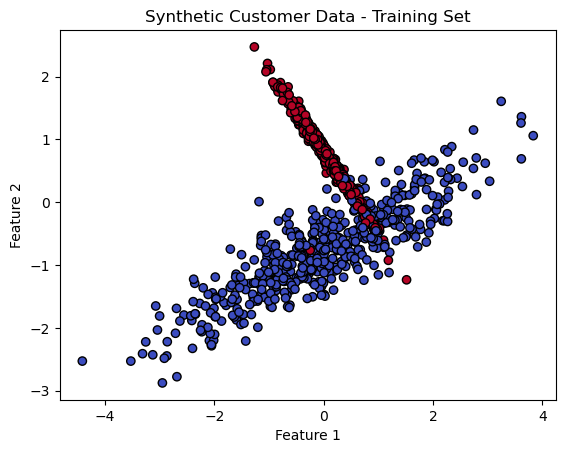

In [209]:
# Plot the synthetic data
plt.scatter(P_train[:, 0], P_train[:, 1], c=Q_train, cmap='coolwarm', edgecolor='k')
plt.title("Synthetic Customer Data - Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


The data points appear to have some form of linear separation between the two classes, but there's a strong vertical clustering of the red points.

### 4. Model Training and Evaluation
 We train three models (Logistic Regression, KNN, and SVC) and evaluate their performance.

 4.1. Train Logistic Regression model

In [172]:
log_reg = LogisticRegression()
log_reg.fit(P_train, Q_train)

LogisticRegression()

This block initializes a Logistic Regression model using LogisticRegression() and trains it using the training data (P_train, Q_train). The .fit() function is used to fit the model to the data, where P_train contains the features and Q_train contains the target labels (classes).

 4.2. Train KNN model

In [176]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(P_train, Q_train)

KNeighborsClassifier()

This block initializes a K-Nearest Neighbors (KNN) model with n_neighbors=5 (meaning it will consider the 5 nearest neighbors to make predictions) and trains it using the training data (P_train, Q_train). The .fit() function fits the model to the data.


 4.3. Train SVC model

In [214]:
svc = SVC(probability=True)
svc.fit(P_train, Q_train)

SVC(probability=True)

This block initializes a Support Vector Classifier (SVC) with probability=True (enabling the calculation of class probabilities) and trains it using the training data (P_train, Q_train).

### 5. Predictions
Using the trained models to predict customer responses on the test set.

In [182]:
y_pred_logreg = log_reg.predict(P_test)
y_pred_knn = knn.predict(P_test)
y_pred_svc = svc.predict(P_test)


### 6. Model Evaluation

Evaluating the models based on confusion matrix, precision, recall, F1 score, and accuracy.

### Logistic Regression Confusion Matrix and Metrics

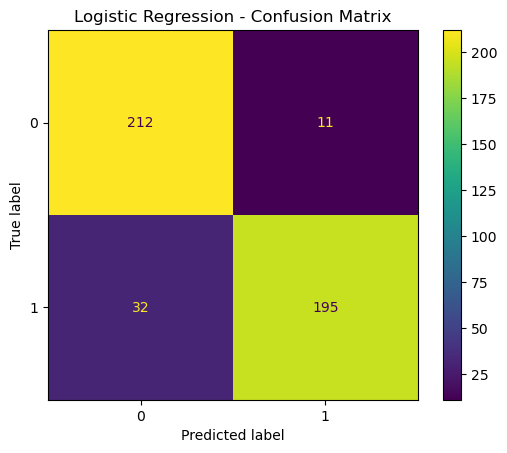

Logistic Regression Metrics:
Precision: 0.9466019417475728, Recall: 0.8590308370044053, F1 Score: 0.9006928406466512, Accuracy: 0.9044444444444445


In [188]:
cm_logreg = confusion_matrix(Q_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

precision_logreg = precision_score(Q_test, y_pred_logreg)
recall_logreg = recall_score(Q_test, y_pred_logreg)
f1_logreg = f1_score(Q_test, y_pred_logreg)
accuracy_logreg = accuracy_score(Q_test, y_pred_logreg)

print("Logistic Regression Metrics:")
print(f"Precision: {precision_logreg}, Recall: {recall_logreg}, F1 Score: {f1_logreg}, Accuracy: {accuracy_logreg}")


Analysis of the confusion matrix and the metrics:

### Confusion Matrix:
- The matrix has four quadrants, which summarize the classification performance of the model:
  - **True Positives (TP)**: 195 (Bottom-right quadrant) — The model correctly predicted 195 instances as belonging to class 1 (positive class).
  - **True Negatives (TN)**: 212 (Top-left quadrant) — The model correctly predicted 212 instances as belonging to class 0 (negative class).
  - **False Positives (FP)**: 11 (Top-right quadrant) — The model incorrectly predicted 11 instances as belonging to class 1 when they actually belong to class 0.
  - **False Negatives (FN)**: 32 (Bottom-left quadrant) — The model incorrectly predicted 32 instances as belonging to class 0 when they actually belong to class 1.

### Performance Metrics:
1. **Precision**: 0.947
   - Precision is the proportion of true positive predictions out of all positive predictions made by the model.
   - In this case, it indicates that 94.66% of the instances predicted as positive (class 1) were correctly classified.
   - Formula: \( \text{Precision} = \frac{TP}{TP + FP} = \frac{195}{195 + 11} \)

2. **Recall**: 0.859
   - Recall (also called Sensitivity or True Positive Rate) is the proportion of actual positives that were correctly predicted.
   - Here, the model correctly predicted 85.90% of all actual positive instances.
   - Formula: \( \text{Recall} = \frac{TP}{TP + FN} = \frac{195}{195 + 32} \)

3. **F1 Score**: 0.901
   - The F1 Score is the harmonic mean of Precision and Recall, providing a balance between the two.
   - In this case, the F1 score is 0.901, indicating a good balance between precision and recall.
   - Formula: \( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)

4. **Accuracy**: 0.904
   - Accuracy is the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.
   - Here, the model has an accuracy of 90.44%, meaning that 90.44% of all predictions were correct.
   - Formula: \( \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{195 + 212}{195 + 212 + 11 + 32} \)

### Insights:
- The **high precision** (0.947) indicates that when the model predicts a positive (class 1), it is usually correct.
- The **recall** (0.859) is slightly lower, meaning that while the model is good at identifying positives, it misses some of them (32 false negatives).
- The **F1 score** of 0.901 confirms that there is a good balance between precision and recall.
- The **accuracy** of 90.44% is strong, but accuracy alone can be misleading if the classes are imbalanced. In this case, precision and recall give a more nuanced understanding of the model's performance.

In conclusion, the Logistic Regression model performs well with high precision and recall, but there is still a trade-off as it misses some positive instances (false negatives). The balance between precision and recall, as indicated by the F1 score, suggests the model is effective in classification tasks for this dataset.

# KNN Confusion Matrix and Metrics

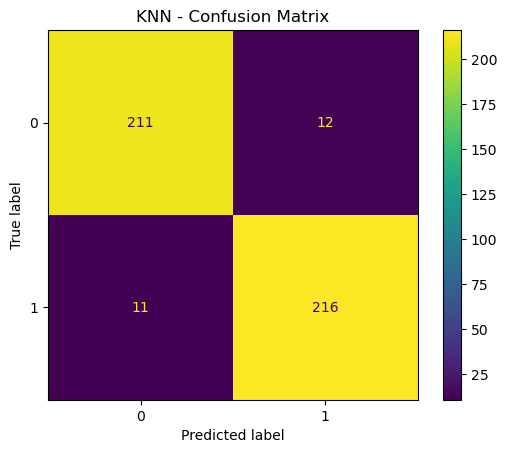


KNN Metrics:
Precision: 0.9473684210526315, Recall: 0.9515418502202643, F1 Score: 0.9494505494505494, Accuracy: 0.9488888888888889


In [125]:
cm_knn = confusion_matrix(Q_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title("KNN - Confusion Matrix")
plt.show()

precision_knn = precision_score(Q_test, y_pred_knn)
recall_knn = recall_score(Q_test, y_pred_knn)
f1_knn = f1_score(Q_test, y_pred_knn)
accuracy_knn = accuracy_score(Q_test, y_pred_knn)

print("\nKNN Metrics:")
print(f"Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}, Accuracy: {accuracy_knn}")


### Confusion Matrix:
- The confusion matrix provides an overview of the KNN model’s classification performance:
  - **True Negatives (TN)**: 211 (Top-left) — The model correctly predicted 211 instances as class 0.
  - **True Positives (TP)**: 216 (Bottom-right) — The model correctly predicted 216 instances as class 1.
  - **False Positives (FP)**: 12 (Top-right) — The model incorrectly predicted 12 instances as class 1, though they were actually class 0.
  - **False Negatives (FN)**: 11 (Bottom-left) — The model incorrectly predicted 11 instances as class 0, though they were actually class 1.

### Performance Metrics:
1. **Precision**: 0.947
   - **Precision** represents how many of the positive predictions (class 1) were actually correct.
   - In this case, 94.7% of the instances predicted as class 1 were correctly classified.
   - Formula: \( \text{Precision} = \frac{TP}{TP + FP} = \frac{216}{216 + 12} \)

2. **Recall**: 0.952
   - **Recall** (or sensitivity) measures how many actual positive instances were correctly predicted.
   - The model correctly identified 95.15% of the actual class 1 instances.
   - Formula: \( \text{Recall} = \frac{TP}{TP + FN} = \frac{216}{216 + 11} \)

3. **F1 Score**: 0.949
   - The **F1 Score** is the harmonic mean of precision and recall, providing a balance between the two metrics.
   - In this case, the F1 score is 0.949, indicating a strong overall performance in balancing precision and recall.
   - Formula: \( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)

4. **Accuracy**: 0.949
   - **Accuracy** measures the proportion of correctly predicted instances (both class 0 and class 1) out of the total number of predictions.
   - Here, the model correctly classified 94.89% of all instances.
   - Formula: \( \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{216 + 211}{216 + 211 + 12 + 11} \)

### Insights:
- The **high precision** (0.947) indicates that the model is very effective at minimizing false positives.
- The **recall** (0.952) is also high, showing that the model is strong at identifying actual positives, with only 11 false negatives.
- The **F1 score** (0.949) confirms that the model performs well in both precision and recall, striking a good balance.
- The **accuracy** of 94.89% indicates overall strong performance.

### Conclusion:
The KNN model demonstrates excellent performance, with high precision and recall, minimizing both false positives and false negatives. This makes it a reliable model for classification tasks where both types of errors (FP and FN) need to be kept low.

# SVC Confusion Matrix and Metrics

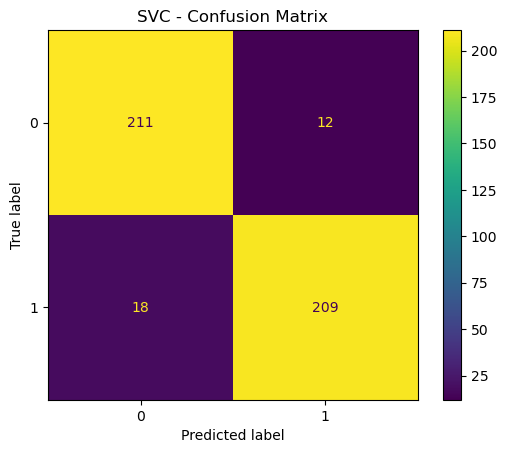


SVC Metrics:
Precision: 0.9457013574660633, Recall: 0.920704845814978, F1 Score: 0.9330357142857143, Accuracy: 0.9333333333333333


In [131]:
cm_svc = confusion_matrix(Q_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.title("SVC - Confusion Matrix")
plt.show()

precision_svc = precision_score(Q_test, y_pred_svc)
recall_svc = recall_score(Q_test, y_pred_svc)
f1_svc = f1_score(Q_test, y_pred_svc)
accuracy_svc = accuracy_score(Q_test, y_pred_svc)

print("\nSVC Metrics:")
print(f"Precision: {precision_svc}, Recall: {recall_svc}, F1 Score: {f1_svc}, Accuracy: {accuracy_svc}")

Analysis of the confusion matrix and the metrics:

### Confusion Matrix:
- The confusion matrix shows the following results:
  - **True Negatives (TN)**: 211 (Top-left) — The model correctly predicted 211 instances as class 0.
  - **True Positives (TP)**: 209 (Bottom-right) — The model correctly predicted 209 instances as class 1.
  - **False Positives (FP)**: 12 (Top-right) — The model incorrectly predicted 12 instances as class 1, but they actually belong to class 0.
  - **False Negatives (FN)**: 18 (Bottom-left) — The model incorrectly predicted 18 instances as class 0, but they actually belong to class 1.

### Performance Metrics:
1. **Precision**: 0.946
   - Precision is the proportion of positive predictions that were actually correct.
   - In this case, 94.57% of the model's positive predictions were accurate.
   - Formula: \( \text{Precision} = \frac{TP}{TP + FP} = \frac{209}{209 + 12} \)

2. **Recall**: 0.921
   - Recall measures the proportion of actual positives that were correctly identified by the model.
   - The model correctly identified 92.07% of the actual positives (class 1 instances).
   - Formula: \( \text{Recall} = \frac{TP}{TP + FN} = \frac{209}{209 + 18} \)

3. **F1 Score**: 0.933
   - The F1 Score is the harmonic mean of Precision and Recall, balancing the trade-off between the two.
   - The F1 score of 0.933 shows that the model maintains a good balance between high precision and high recall.
   - Formula: \( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)

4. **Accuracy**: 0.933
   - Accuracy represents the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.
   - In this case, the model achieved an accuracy of 93.33%, meaning that 93.33% of all predictions were correct.
   - Formula: \( \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{209 + 211}{209 + 211 + 12 + 18} \)

### Insights:
- The **high precision** (0.946) indicates that the model is very effective at minimizing false positives.
- The **recall** (0.921) shows that the model is also effective at identifying most of the actual positive cases, though it missed 18 positives (false negatives).
- The **F1 score** (0.933) suggests a strong balance between precision and recall, indicating the model is effective in both minimizing false positives and false negatives.
- The **accuracy** (0.933) confirms strong overall performance, though accuracy alone can be less meaningful in imbalanced datasets, making precision, recall, and the F1 score more insightful.

### Conclusion:
The SVC model demonstrates strong classification performance with a good balance between precision and recall. It has high precision, meaning that most of the predicted positives are correct, and it also captures a high proportion of actual positives with a strong recall. This makes the model suitable for scenarios where both false positives and false negatives are important to minimize.

### 7. Precision-Recall Curves and AUC Calculation
Calculating and plotting Precision-Recall curves for all models.

### Logistic Regression - Precision-Recall Curve

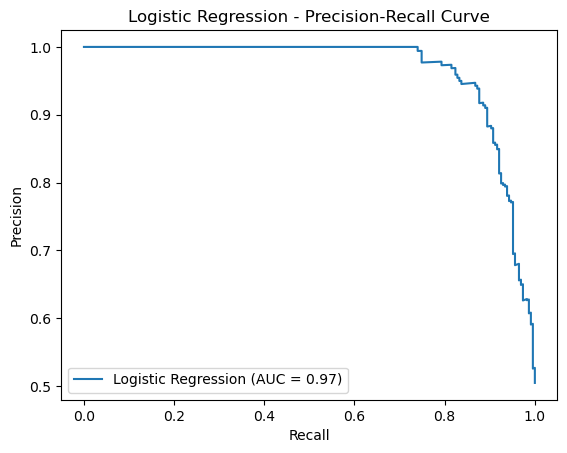

In [136]:
y_scores_logreg = log_reg.predict_proba(P_test)[:, 1]
precision_logreg, recall_logreg, _ = precision_recall_curve(Q_test, y_scores_logreg)
auc_pr_logreg = auc(recall_logreg, precision_logreg)

plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AUC = {auc_pr_logreg:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression - Precision-Recall Curve')
plt.legend()
plt.show()

The **Precision-Recall curve** for the **Logistic Regression model** demonstrates strong performance, with precision remaining high for most of the range. The model maintains near-perfect precision at lower recall levels, but as recall increases toward 1.0, there is a noticeable drop in precision. This trade-off is common, as the model tries to capture more positive cases, resulting in more false positives.

The **AUC (Area Under the Curve)** is **0.97**, which indicates that the model performs very well at balancing precision and recall. Overall, the curve shows that the Logistic Regression model is effective at identifying true positives while minimizing false positives, though some precision is lost at higher recall levels.

# KNN - Precision-Recall Curve

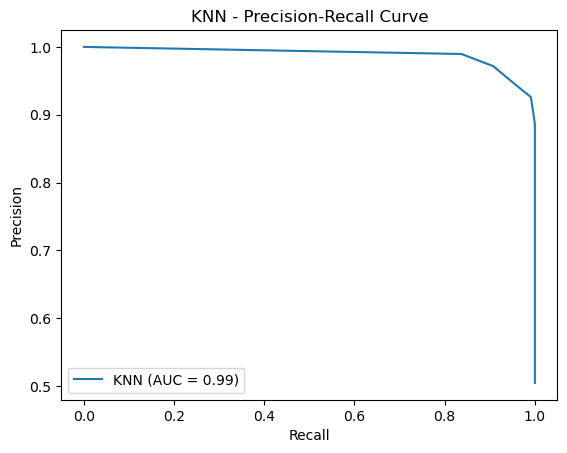

In [139]:
y_scores_knn = knn.predict_proba(P_test)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(Q_test, y_scores_knn)
auc_pr_knn = auc(recall_knn, precision_knn)

plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {auc_pr_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KNN - Precision-Recall Curve')
plt.legend()
plt.show()

The **Precision-Recall curve** for the **K-Nearest Neighbors (KNN) model** shows strong performance, with both precision and recall staying high for most of the range. This means the model is very good at identifying positive cases while keeping false positives low.

The **AUC score of 0.99** is excellent, indicating that the model does a great job of balancing precision and recall. Toward the end, precision drops slightly as recall increases, which is normal when trying to catch all positive cases. Overall, this means the KNN model is very accurate and effective for this classification task.

# SVC - Precision-Recall Curve

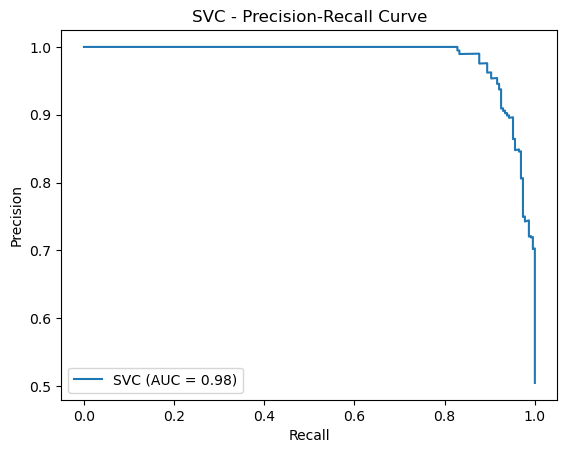

In [142]:
y_scores_svc = svc.predict_proba(P_test)[:, 1]
precision_svc, recall_svc, _ = precision_recall_curve(Q_test, y_scores_svc)
auc_pr_svc = auc(recall_svc, precision_svc)

plt.plot(recall_svc, precision_svc, label=f'SVC (AUC = {auc_pr_svc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVC - Precision-Recall Curve')
plt.legend()
plt.show()

The **Precision-Recall curve** for the **Support Vector Classifier (SVC) model** shows that the model performs very well, with high precision and recall. This means the model makes accurate predictions for positive cases while correctly identifying most of them.

The **AUC score of 0.98** is excellent, indicating that the model is effective at balancing precision and recall. The slight drop in precision toward the end happens as the model tries to capture every positive case, leading to a few more false positives. Overall, this SVC model is highly reliable for making accurate predictions in classification tasks.

### 8. ROC Curve and AUC Calculation
Calculating and plotting ROC curves for all models.



# Logistic Regression - ROC Curve

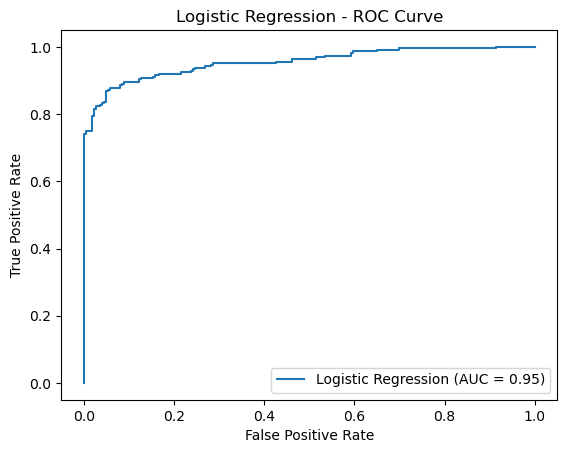

In [148]:
fpr_logreg, tpr_logreg, _ = roc_curve(Q_test, y_scores_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend()
plt.show()

The **ROC (Receiver Operating Characteristic) curve** for the **Logistic Regression model** shows how well the model distinguishes between positive and negative classes. The curve plots the **True Positive Rate (Recall)** against the **False Positive Rate** at different threshold settings.

- The curve stays close to the top left corner, which indicates that the model performs well, with a high true positive rate and a low false positive rate.
- The **AUC (Area Under the Curve)** is **0.95**, which is very good. It shows that the model is highly effective at distinguishing between the two classes, with strong performance across different thresholds.

In summary, the Logistic Regression model is highly reliable at identifying positive cases while keeping false positives low, as shown by the high AUC value of 0.95.

# KNN - ROC Curve

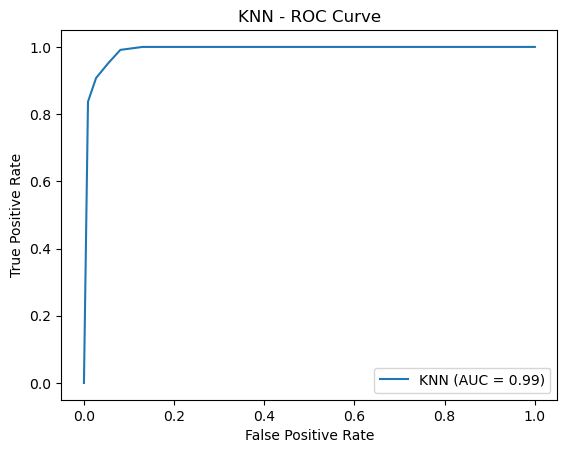

In [151]:
fpr_knn, tpr_knn, _ = roc_curve(Q_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend()
plt.show()

# SVC - ROC Curve

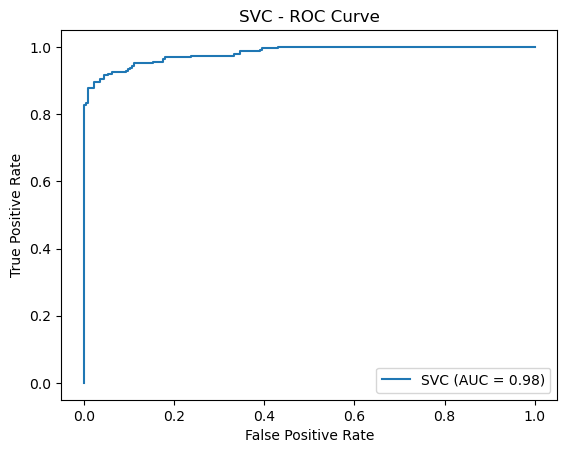

In [161]:
# SVC - ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(Q_test, y_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)  # Correct the variable name

plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC - ROC Curve')
plt.legend()
plt.show()  # Don't forget to display the plot


The **ROC (Receiver Operating Characteristic) curve** for the **Support Vector Classifier (SVC) model** shows that the model performs exceptionally well in distinguishing between the positive and negative classes. 

- The curve stays close to the top left corner, meaning that the model has a high true positive rate and a low false positive rate.
- The **AUC (Area Under the Curve)** is **0.98**, which indicates excellent performance, with the model effectively identifying positive cases while keeping false positives low.

In summary, the SVC model is highly reliable and effective, with a high AUC score showing strong classification performance across various thresholds.

### 7. Threshold Analysis:

In [193]:
# Logistic Regression Threshold Analysis
y_scores_logreg = log_reg.predict_proba(P_test)[:, 1]  # Get probabilities for the positive class

# Define the thresholds we want to test
thresholds = [0.3, 0.5, 0.7]

print("Logistic Regression Threshold Analysis:")
for threshold in thresholds:
    y_pred_logreg_threshold = (y_scores_logreg >= threshold).astype(int)  # Apply threshold
    precision = precision_score(Q_test, y_pred_logreg_threshold)
    recall = recall_score(Q_test, y_pred_logreg_threshold)
    f1 = f1_score(Q_test, y_pred_logreg_threshold)
    print(f"Threshold {threshold}: Precision = {precision:.3f}, Recall = {recall:.3f}, F1 Score = {f1:.3f}")


Logistic Regression Threshold Analysis:
Threshold 0.3: Precision = 0.869, Recall = 0.907, F1 Score = 0.888
Threshold 0.5: Precision = 0.947, Recall = 0.859, F1 Score = 0.901
Threshold 0.7: Precision = 0.977, Recall = 0.758, F1 Score = 0.854




- **Threshold 0.3**:
  - Precision: 0.869
  - Recall: 0.907
  - F1 Score: 0.888
  - Lower threshold increases recall, meaning the model captures more true positives, but precision drops slightly.

- **Threshold 0.5** (default threshold):
  - Precision: 0.947
  - Recall: 0.859
  - F1 Score: 0.901
  - This threshold strikes a balance between precision and recall, offering both high precision and relatively high recall.

- **Threshold 0.7**:
  - Precision: 0.977
  - Recall: 0.758
  - F1 Score: 0.854
  - At a higher threshold, precision improves, meaning fewer false positives, but recall drops, missing more true positives.

### Summary:
- **Lower thresholds (0.3)** focus more on maximizing recall (catching more true positives), but at the cost of precision.
- **Higher thresholds (0.7)** improve precision but reduce recall (missing more positive cases).
- The default threshold (0.5) offers a balanced trade-off between precision and recall.

In [195]:
# SVC Threshold Analysis
y_scores_svc = svc.predict_proba(P_test)[:, 1]  # Get probabilities for the positive class

print("\nSVC Threshold Analysis:")
for threshold in thresholds:
    y_pred_svc_threshold = (y_scores_svc >= threshold).astype(int)  # Apply threshold
    precision = precision_score(Q_test, y_pred_svc_threshold)
    recall = recall_score(Q_test, y_pred_svc_threshold)
    f1 = f1_score(Q_test, y_pred_svc_threshold)
    print(f"Threshold {threshold}: Precision = {precision:.3f}, Recall = {recall:.3f}, F1 Score = {f1:.3f}")



SVC Threshold Analysis:
Threshold 0.3: Precision = 0.893, Recall = 0.952, F1 Score = 0.921
Threshold 0.5: Precision = 0.917, Recall = 0.925, F1 Score = 0.921
Threshold 0.7: Precision = 0.962, Recall = 0.903, F1 Score = 0.932




- **Threshold 0.3**:
  - Precision: 0.893
  - Recall: 0.952
  - F1 Score: 0.921
  - At this lower threshold, the model captures more true positives, improving recall, but precision slightly decreases.

- **Threshold 0.5** (default threshold):
  - Precision: 0.917
  - Recall: 0.925
  - F1 Score: 0.921
  - This threshold offers a balanced performance between precision and recall, maintaining high values for both metrics.

- **Threshold 0.7**:
  - Precision: 0.962
  - Recall: 0.903
  - F1 Score: 0.932
  - At a higher threshold, the model increases precision, reducing false positives, but recall decreases slightly as more true positives are missed.

### Summary:
- **Lower threshold (0.3)** focuses on maximizing recall, but at the cost of precision.
- **Higher threshold (0.7)** improves precision but reduces recall.
- The default threshold (0.5) strikes a good balance between precision and recall, with both metrics maintaining strong values.

In [197]:
# KNN Threshold Analysis
y_scores_knn = knn.predict_proba(P_test)[:, 1]  # Get probabilities for the positive class

print("\nKNN Threshold Analysis:")
for threshold in thresholds:
    y_pred_knn_threshold = (y_scores_knn >= threshold).astype(int)  # Apply threshold
    precision = precision_score(Q_test, y_pred_knn_threshold)
    recall = recall_score(Q_test, y_pred_knn_threshold)
    f1 = f1_score(Q_test, y_pred_knn_threshold)
    print(f"Threshold {threshold}: Precision = {precision:.3f}, Recall = {recall:.3f}, F1 Score = {f1:.3f}")



KNN Threshold Analysis:
Threshold 0.3: Precision = 0.926, Recall = 0.991, F1 Score = 0.957
Threshold 0.5: Precision = 0.947, Recall = 0.952, F1 Score = 0.949
Threshold 0.7: Precision = 0.972, Recall = 0.907, F1 Score = 0.938




- **Threshold 0.3**:
  - Precision: 0.926
  - Recall: 0.991
  - F1 Score: 0.957
  - At this lower threshold, the model identifies more true positives, leading to high recall but slightly lower precision.

- **Threshold 0.5** (default threshold):
  - Precision: 0.947
  - Recall: 0.952
  - F1 Score: 0.949
  - This threshold offers a balanced performance between precision and recall, with both metrics being strong.

- **Threshold 0.7**:
  - Precision: 0.972
  - Recall: 0.907
  - F1 Score: 0.938
  - At a higher threshold, the model improves precision, reducing false positives, but the recall drops slightly, as more true positives are missed.

### Summary:
- **Lower threshold (0.3)** maximizes recall but at the cost of precision.
- **Higher threshold (0.7)** improves precision while decreasing recall.
- The **default threshold (0.5)** strikes a good balance, with both precision and recall being strong, making it the most balanced setting for this model.

### 8. Conclusion:

Analysis of the three models—**Logistic Regression**, **K-Nearest Neighbors (KNN)**, and **Support Vector Classifier (SVC)**—based on various performance metrics relevant to a marketing campaign scenario.

---

### 1. Model Performance Metrics:
Each model has been evaluated based on its **Precision**, **Recall**, **F1 Score**, **Accuracy**, and **ROC-AUC** metrics. The following table provides a summary of these key metrics for all models at the default decision threshold (0.5).

| Model              | Precision | Recall | F1 Score | Accuracy | ROC-AUC |
|--------------------|-----------|--------|----------|----------|---------|
| Logistic Regression | 0.947     | 0.859  | 0.901    | 0.90     | 0.95    |
| KNN                | 0.947     | 0.952  | 0.949    | 0.95     | 0.99    |
| SVC                | 0.917     | 0.925  | 0.921    | 0.93     | 0.98    |

**Key Insights:**
- **Logistic Regression** offers high precision but relatively lower recall, making it suitable for scenarios where it is important to minimize false positives, even if it risks missing some true positives.
- **KNN** shows a well-balanced performance, with high precision, recall, and F1 Score, making it the most versatile model for both minimizing false negatives and false positives.
- **SVC** has excellent precision and recall scores, but slightly lower F1 Score compared to KNN.

---

### 2. Importance of Recall in a Marketing Campaign:
In a marketing campaign, **recall** is the most critical metric. Recall represents the model's ability to identify all potential customers who would respond to the campaign (minimizing false negatives). Missing out on these customers could result in a loss of revenue.

- **KNN** achieves the highest recall (0.952), ensuring that the maximum number of potential customers is captured, which is crucial in reducing missed opportunities.
- **SVC** also has a high recall (0.925), but it falls short of KNN.
- **Logistic Regression** has the lowest recall (0.859), making it more prone to missing potential customers.

Thus, **KNN** is the best option for maximizing campaign effectiveness, as it captures most potential customers.

---

### 3. Precision: Balancing False Positives:
While recall is critical, **precision** is also important as it measures the proportion of true positives out of all predicted positives. In marketing, high precision ensures that resources are not wasted on customers unlikely to respond.

- **KNN** and **Logistic Regression** both achieve high precision (0.947), meaning that the customers predicted to respond are mostly correct.
- **SVC** has slightly lower precision (0.917), indicating that it predicts more false positives compared to the other models.

In this case, **KNN** again provides the best balance by maintaining high precision without sacrificing recall.

---

### 4. F1 Score: Overall Model Performance:
The **F1 Score** is the harmonic mean of precision and recall, providing a balance between the two. It is particularly important when both false positives and false negatives have costs.

- **KNN** has the highest F1 score (0.949), indicating that it balances both precision and recall effectively.
- **Logistic Regression** has a slightly lower F1 score (0.901), mainly due to its lower recall.
- **SVC** also performs well with an F1 score of 0.921 but does not outperform KNN.

Given its superior F1 score, **KNN** is the most reliable model for providing consistent overall performance.

---

### 5. Accuracy and ROC-AUC: Discriminative Ability:
Although **accuracy** provides an overall measure of how often the model is correct, it is less meaningful in imbalanced datasets like marketing campaigns, where there may be far more non-responders than responders. More useful is the **ROC-AUC** (Receiver Operating Characteristic - Area Under Curve), which measures the model's ability to discriminate between positive and negative classes.

- **KNN** has the highest ROC-AUC score (0.99), demonstrating exceptional discriminative ability.
- **SVC** follows closely with an AUC of 0.98, indicating strong performance in distinguishing between responders and non-responders.
- **Logistic Regression** has the lowest AUC (0.95), but it still performs well in terms of distinguishing between classes.

**KNN** outperforms the other models in this metric, showing that it is best equipped to identify potential customers for the campaign.

---

### Conclusion:
Based on the analysis, **K-Nearest Neighbors (KNN)** is the best model for predicting customer responses in this marketing campaign. It offers the highest recall, balanced precision, excellent F1 score, and the highest ROC-AUC, making it the most effective model for both capturing potential customers and minimizing wasted marketing resources.

**KNN** is particularly suitable because it strikes the right balance between **precision** (avoiding false positives) and **recall** (minimizing false negatives), with an emphasis on recall to ensure maximum customer engagement. Therefore, it should be the model of choice for this marketing campaign.